<a href="https://colab.research.google.com/github/wiiiiish/2022-machine_learning/blob/main/ex10_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0_(3%EA%B0%80%EC%A7%80_%EB%8F%99%EB%AC%BC_%EB%B6%84%EB%A5%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 0. 학습 데이터 전처리

In [9]:
%cd 2022-04-11\ 머신러닝

/content/drive/MyDrive/Colab Notebooks/2022-04-11 머신러닝


In [10]:
!ls

 data
 ex00_colab사용하기.ipynb
'ex01_비만도 데이터 학습하기.ipynb'
'ex02_주택가격 데이터 예측하기.ipynb'
'ex10_다중분류모델 만들기 (3가지 동물 분류).ipynb'


In [13]:
!unzip ./data/머신러닝.zip -d ./data

Archive:  ./data/머신러닝.zip
   creating: ./data/jo/
  inflating: ./data/jo/1.png         
  inflating: ./data/jo/10.png        
  inflating: ./data/jo/100.png       
  inflating: ./data/jo/101.png       
  inflating: ./data/jo/102.png       
  inflating: ./data/jo/103.png       
  inflating: ./data/jo/104.png       
  inflating: ./data/jo/105.png       
  inflating: ./data/jo/106.png       
  inflating: ./data/jo/107.png       
  inflating: ./data/jo/108.png       
  inflating: ./data/jo/109.png       
  inflating: ./data/jo/11.png        
  inflating: ./data/jo/110.png       
  inflating: ./data/jo/111.png       
  inflating: ./data/jo/112.png       
  inflating: ./data/jo/113.png       
  inflating: ./data/jo/114.png       
  inflating: ./data/jo/115.png       
  inflating: ./data/jo/116.png       
  inflating: ./data/jo/117.png       
  inflating: ./data/jo/118.png       
  inflating: ./data/jo/119.png       
  inflating: ./data/jo/12.png        
  inflating: ./data/jo/120.png       


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os # 파이썬을 이용해 시스템 정보를 확인하고 제어하는 라이브러리

In [16]:
# 특정 폴더 밑에 사진 이름이 규칙적이지 않을 경우에는 os모듈을 이용하자
img = cv2.imread('./data/jo/1.png')
img.shape

(201, 251, 3)

In [17]:
# 폴더 밑에 있는 파일이나 디렉토리 이름을 얻어내는 함수
jo_file_names = os.listdir('./data/jo')
jo_file_names

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '

In [18]:
park_file_names = os.listdir('./data/park')
park_file_names

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '

In [19]:
lee_file_names = os.listdir('./data/lee')
lee_file_names

['1.png',
 '10.png',
 '100.png',
 '101.png',
 '102.png',
 '103.png',
 '104.png',
 '105.png',
 '106.png',
 '107.png',
 '108.png',
 '109.png',
 '11.png',
 '110.png',
 '111.png',
 '112.png',
 '113.png',
 '114.png',
 '115.png',
 '116.png',
 '117.png',
 '118.png',
 '119.png',
 '12.png',
 '120.png',
 '121.png',
 '122.png',
 '123.png',
 '124.png',
 '125.png',
 '126.png',
 '127.png',
 '128.png',
 '129.png',
 '13.png',
 '130.png',
 '131.png',
 '132.png',
 '133.png',
 '134.png',
 '135.png',
 '136.png',
 '137.png',
 '138.png',
 '139.png',
 '14.png',
 '140.png',
 '141.png',
 '142.png',
 '143.png',
 '144.png',
 '145.png',
 '146.png',
 '147.png',
 '148.png',
 '149.png',
 '15.png',
 '150.png',
 '151.png',
 '152.png',
 '153.png',
 '154.png',
 '155.png',
 '156.png',
 '157.png',
 '158.png',
 '159.png',
 '16.png',
 '160.png',
 '161.png',
 '162.png',
 '163.png',
 '164.png',
 '165.png',
 '166.png',
 '167.png',
 '168.png',
 '169.png',
 '17.png',
 '170.png',
 '171.png',
 '172.png',
 '173.png',
 '174.png',
 '

In [20]:
jo_images = []
for fname in jo_file_names:
    raw_img = cv2.imread('./data/jo/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB) # BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화 (-1 ~ 1)
    normalized_img = (np.array(resize_img, dtype=np.float32) / 127.0) - 1
    jo_images.append(np.array(normalized_img)) # numpy 타입으로 변환
    
jo_images = np.array(jo_images)
jo_images.shape

(400, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show>

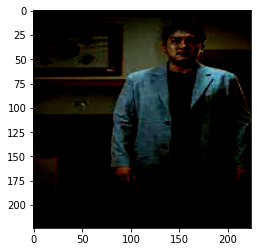

In [21]:
plt.imshow(jo_images[1])
plt.show

In [22]:
lee_images = []
for fname in lee_file_names:
    raw_img = cv2.imread('./data/lee/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB) # BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화 (-1 ~ 1)
    normalized_img = (np.array(resize_img, dtype=np.float32) / 127.0) - 1
    lee_images.append(np.array(normalized_img)) # numpy 타입으로 변환
    
lee_images = np.array(lee_images)
lee_images.shape

(393, 224, 224, 3)

In [23]:
park_images = []
for fname in park_file_names:
    raw_img = cv2.imread('./data/park/'+fname)
    raw_img_rgb = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB) # BGR -> RGB
    # 이미지 크기 조절하기
    resize_img = cv2.resize(raw_img_rgb, dsize=(224,224), interpolation=cv2.INTER_AREA)
    # 이미지 정규화 (-1 ~ 1)
    normalized_img = (np.array(resize_img, dtype=np.float32) / 127.0) - 1
    park_images.append(np.array(normalized_img)) # numpy 타입으로 변환
    
park_images = np.array(park_images)
park_images.shape

(399, 224, 224, 3)

In [24]:
X = np.concatenate([jo_images, park_images, lee_images])
X.shape

(1192, 224, 224, 3)

In [25]:
# 조진웅 0, 박성웅 1, 이승협2
y = np.array([0]*400 + [1]*399 + [2]*393)
y.shape

(1192,)

#### 1. 모델 생성

In [26]:
from tensorflow.keras.models import Sequential # 신경망을 붙이는 뼈대
from tensorflow.keras.layers import InputLayer, Dense # 입력층 / 중간 및 출력층

In [ ]:
person_model = Sequential() # 뼈대 생성
person_model.add(InputLayer(input_shape=(224*224*3,)))
person_model.add(Dense(units=128, activation='sigmoid'))
person_model.add(Dense(units=256, activation='sigmoid'))
person_model.add(Dense(units=512, activation='sigmoid'))
person_model.add(Dense(units=1024, activation='sigmoid'))
person_model.add(Dense(units=3, activation='softmax'))

#### 2. 모델 학습

In [ ]:
person_model.compile(loss="sparse_categorical_crossentropy",
                    optimizer='Adam',
                    metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=425)

In [ ]:
X_train.shape

(953, 224, 224, 3)

In [ ]:
person_model.fit(X_train.reshape(953, 224*224*3),
                y_train, epochs=100)

Epoch 1/100
30/30 [==============================] - 3s 100ms/step - loss: 1.2202 - accuracy: 0.3274
Epoch 2/100
30/30 [==============================] - 3s 99ms/step - loss: 1.1228 - accuracy: 0.3767
Epoch 3/100
30/30 [==============================] - 3s 99ms/step - loss: 1.0675 - accuracy: 0.4092
Epoch 4/100
30/30 [==============================] - 3s 103ms/step - loss: 1.1327 - accuracy: 0.3882
Epoch 5/100
30/30 [==============================] - 3s 99ms/step - loss: 1.0938 - accuracy: 0.4029
Epoch 6/100
30/30 [==============================] - 3s 99ms/step - loss: 1.0617 - accuracy: 0.4187
Epoch 7/100
30/30 [==============================] - 3s 99ms/step - loss: 1.0137 - accuracy: 0.4638
Epoch 8/100
30/30 [==============================] - 3s 99ms/step - loss: 1.0227 - accuracy: 0.4512
Epoch 9/100
30/30 [==============================] - 3s 101ms/step - loss: 1.0030 - accuracy: 0.4953
Epoch 10/100
30/30 [==============================] - 3s 99ms/step - loss: 1.0045 - accuracy: 0.4

#### 3. 모델 예측

In [ ]:
X_test.shape

(239, 224, 224, 3)

In [ ]:
pre = person_model.predict(X_test.reshape(239, 224*224*3))
pre

array([[4.10590440e-01, 4.87537891e-01, 1.01871684e-01],
       [2.70502388e-01, 7.27710128e-01, 1.78749498e-03],
       [5.99640310e-02, 8.98722291e-01, 4.13136743e-02],
       [4.50133324e-01, 4.57075357e-01, 9.27913785e-02],
       [4.15184259e-01, 4.75004345e-01, 1.09811366e-01],
       [4.44372028e-01, 5.03924191e-01, 5.17037958e-02],
       [3.72288972e-02, 2.43875831e-01, 7.18895316e-01],
       [4.72234458e-01, 5.25496721e-01, 2.26879492e-03],
       [3.97907436e-01, 3.84686768e-01, 2.17405811e-01],
       [2.33984403e-02, 9.73264754e-01, 3.33680771e-03],
       [2.43646894e-02, 4.44266424e-02, 9.31208670e-01],
       [5.06366730e-01, 4.19581503e-01, 7.40518719e-02],
       [5.26264489e-01, 3.99914891e-01, 7.38205761e-02],
       [4.20123935e-01, 4.77219760e-01, 1.02656305e-01],
       [6.47459179e-02, 1.31350741e-01, 8.03903282e-01],
       [2.05358714e-01, 6.04500294e-01, 1.90140963e-01],
       [1.17371187e-01, 4.28113043e-01, 4.54515845e-01],
       [3.21785696e-02, 4.95747

#### 4. 모델 평가

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,pre.argmax(1)))

              precision    recall  f1-score   support

           0       0.41      0.44      0.42        79
           1       0.41      0.60      0.48        80
           2       0.60      0.26      0.37        80

    accuracy                           0.44       239
   macro avg       0.47      0.44      0.42       239
weighted avg       0.47      0.44      0.42       239



2022-04-27
## CNN 모델 만들기

In [27]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

#### 1. 모델 생성

In [44]:
cnn_model = Sequential() # 모델의 뼈대
# 특성 추출부(CNN layer)
cnn_model.add(InputLayer(input_shape=(224,224,3)))
cnn_model.add(Conv2D(filters=128,
                    kernel_size=(5,5),
                    activation="relu"))
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=256,
                    kernel_size=(5,5),
                    activation="relu"))
cnn_model.add(MaxPool2D())
cnn_model.add(Conv2D(filters=512,
                    kernel_size=(5,5),
                    activation="relu"))
cnn_model.add(MaxPool2D())
# 분류기 (MLP)
cnn_model.add(Flatten())
cnn_model.add(Dense(units=64, activation='sigmoid'))
cnn_model.add(Dense(units=32, activation='sigmoid'))
cnn_model.add(Dense(units=16, activation='softmax'))

In [45]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 220, 220, 128)     9728      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 110, 110, 128)    0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 106, 106, 256)     819456    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 53, 53, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 49, 49, 512)       3277312   
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 24, 24, 512)     

#### 2. 모델 학습

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=425)

In [46]:
cnn_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer="Adam",
                 metrics=['accuracy'])

In [47]:
cnn_model.fit(X_train, y_train, epochs= 50)

Epoch 1/50
30/30 [==============================] - 30s 744ms/step - loss: 2.6099 - accuracy: 0.2120
Epoch 2/50
30/30 [==============================] - 16s 544ms/step - loss: 1.8571 - accuracy: 0.3347
Epoch 3/50
30/30 [==============================] - 16s 547ms/step - loss: 1.5019 - accuracy: 0.3158
Epoch 4/50
30/30 [==============================] - 16s 547ms/step - loss: 1.3175 - accuracy: 0.3158
Epoch 5/50
30/30 [==============================] - 16s 547ms/step - loss: 1.2229 - accuracy: 0.3158
Epoch 6/50
30/30 [==============================] - 16s 547ms/step - loss: 1.1791 - accuracy: 0.3179
Epoch 7/50
30/30 [==============================] - 16s 548ms/step - loss: 1.1563 - accuracy: 0.3095
Epoch 8/50
30/30 [==============================] - 16s 548ms/step - loss: 1.1438 - accuracy: 0.3190
Epoch 9/50
30/30 [==============================] - 16s 549ms/step - loss: 1.1336 - accuracy: 0.3326
Epoch 10/50
30/30 [==============================] - 16s 548ms/step - loss: 1.1287 - accura

KeyboardInterrupt: ignored

#### 3. 모델 예측

In [34]:
pre = cnn_model.predict(X_test)

#### 4. 모델 평가

In [35]:
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test, np.argmax(pre,axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        79
           1       0.00      0.00      0.00        80
           2       0.33      1.00      0.50        80

    accuracy                           0.33       239
   macro avg       0.11      0.33      0.17       239
weighted avg       0.11      0.33      0.17       239



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
